### Evaluating Policies

This notebook examines the performance of three different policies for the Cart Pole problem provided by OpenAI Gym (now Gymnasium). To evaluate the performance of a policy, we will repeatedly run it for a set number of episodes. An episode in Cart Pole starts with resetting the environment and continues until the pole is no longer balanced (indicated by the `terminated` flag from the `step` function).

For statistical significance, each policy is run for 10,000 episodes (this is configurable). The length of each episode (which corresponds to the total reward, as 1 point is given per step the pole is balanced) is recorded.

We will calculate and display the minimum, maximum, and average episode lengths for each policy. Additionally, we'll visualize the distribution of episode lengths using a histogram and plot the episode length over the course of the simulation using a scatter plot.

The policies evaluated are:
1.  **Random Policy:** Actions are chosen randomly at each step.
2.  **Alternating Policy:** Actions alternate between moving left (0) and right (1).
3.  **Inner Product Policy:** A policy based on the observation values. We generate random weight vectors, compute the inner product with the observation vector, and choose action 0 if the result is negative, action 1 otherwise. We will search for the best set of weights by trying multiple random vectors and keeping the one that yields the highest average episode length.

In [2]:
from matplotlib import pyplot as plt
import random
import numpy as np # Added for inner product policy

#import OpenAI Gym
import gymnasium as gym
#create CartPole environment
env = gym.make('CartPole-v1')

### Evaluating the performance of the random policy

First, let's evaluate the performance of a completely random policy. In this approach, the agent selects an action (0 for left, 1 for right) uniformly at random at each time step, ignoring the environment's state (observations). We run this policy for `n_episodes` and record the length (number of steps) of each episode in the `number_of_steps` list. Finally, we print the minimum, maximum, and average episode lengths achieved by this random strategy.

In [9]:
n_episodes = 10000
number_of_steps = []

for _ in range(n_episodes):
    _,_ = env.reset()
    terminated = False
    i = 0
    while not terminated:
        action = env.action_space.sample()
        _,_,terminated,_,_ = env.step(action)
        i += 1
    number_of_steps.append(i)

print(f"Minimum length: {min(number_of_steps)}")
print(f"Maximum length: {max(number_of_steps)}")
print(f"Average length: {sum(number_of_steps)/len(number_of_steps)}")

Minimum length: 8
Maximum length: 119
Average length: 22.2195


Now, let's visualize the results obtained from the random policy evaluation. We create two plots:
1. A histogram showing the distribution of episode lengths. This helps understand how often different episode lengths occurred.
2. A scatter plot showing the episode length for each iteration (episode number). This can reveal if there's any trend or change in performance over time (though for a random policy, we expect none).

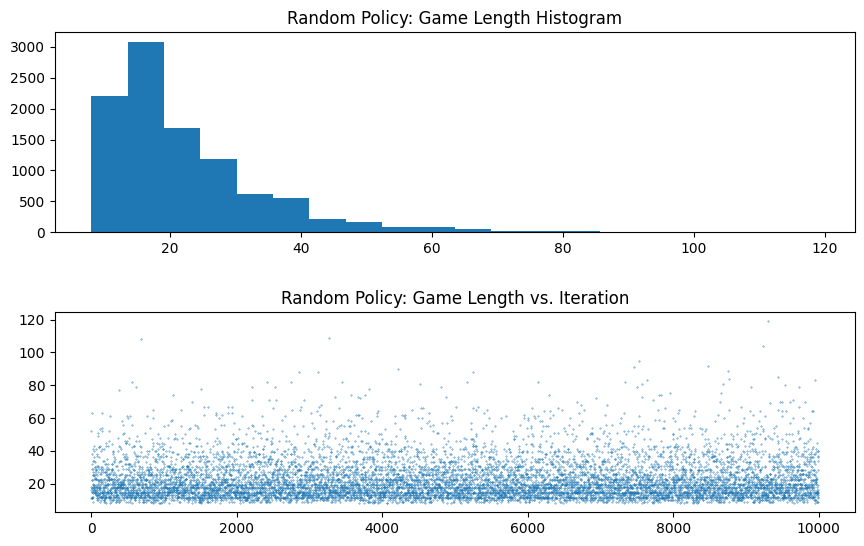

In [10]:
_, axs = plt.subplots(2,figsize=(10,6))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axs[0].hist(number_of_steps, 20)
axs[0].set_title("Random Policy: Game Length Histogram")

iter_vals = [x for x in range(len(number_of_steps))]
axs[1].scatter(iter_vals,number_of_steps,s=0.1)
axs[1].set_title("Random Policy: Game Length vs. Iteration")

plt.show()

### Policy that alternates between moving left and right

Next, we evaluate a simple deterministic policy that alternates its action at each step: move left (0), then right (1), then left (0), and so on. Similar to the random policy evaluation, we run this for `n_episodes`, record the episode lengths, and calculate the summary statistics (min, max, average). This policy also does not use observations.

In [11]:
n_episodes = 10000
number_of_steps = []

for _ in range(n_episodes):
    _,_ = env.reset()
    terminated = False
    i = 0
    while not terminated:
        if i % 2 == 0:
            action = 0
        else:
            action = 1
        _,_,terminated,_,_ = env.step(action)
        i += 1
    number_of_steps.append(i)

print(f"Minimum length: {min(number_of_steps)}")
print(f"Maximum length: {max(number_of_steps)}")
print(f"Average length: {sum(number_of_steps)/len(number_of_steps)}")

Minimum length: 20
Maximum length: 160
Average length: 37.39


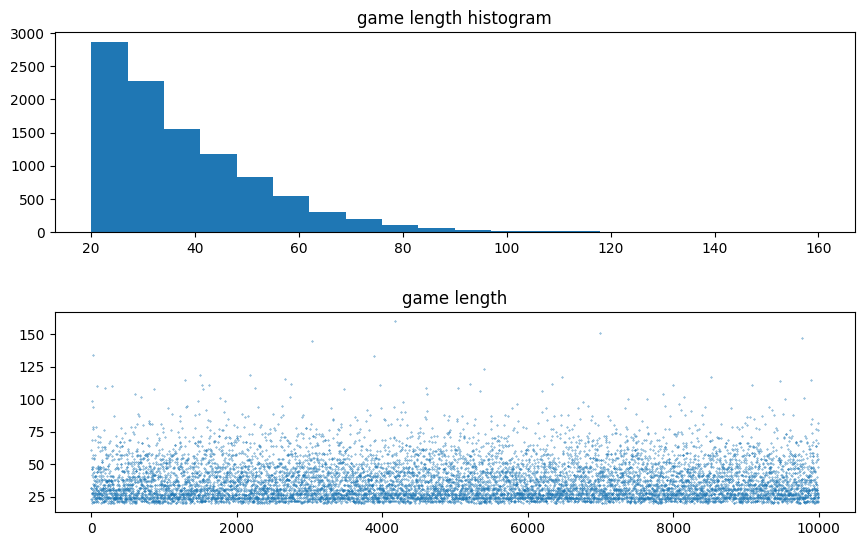

In [12]:
_, axs = plt.subplots(2,figsize=(10,6))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axs[0].hist(number_of_steps, 20)
axs[0].set_title("game length histogram")

iter_vals = [x for x in range(len(number_of_steps))]
axs[1].scatter(iter_vals,number_of_steps,s=0.1)
axs[1].set_title("game length")

plt.show()